# Data Analyst Program - Interim Project 

<hr/>

### Question 2 - What is the relationship between annual leave taken and bonus?

<hr/>
<p>The process of answering the question was completed as follows:<br>

* The columns to be analysed were found and because they were from different tables, a query was made using a join with a following query:

    select h.BusinessEntityID, h.VacationHours, s.Bonus
    from HumanResources.Employee as h
    join Sales.SalesPerson as s
    on h.BusinessEntityID = s.BusinessEntityID

* The query was then exported as a cvs file.


In [2]:
# Importing necessary libraries
# Import pandas to be able to work with DataFrames
import pandas as pd

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

# Import package seaborn, also for visualisation/plotting

import seaborn as sns

# The csv file that was imported from SQL was read and converted into a DataFrame

df = pd.read_csv('Q2.csv')
df.head()

,BusinessEntityID,VacationHours,Bonus
0,274,14,£0.00
1,275,38,"£4,100.00"
2,276,27,"£2,000.00"
3,277,24,"£2,500.00"
4,278,33,£500.00


In [3]:
# Deleting the BusinessEntityID column from the dataframe
df1 = df.drop("BusinessEntityID", axis=1)
df1.head()

,VacationHours,Bonus
0,14,£0.00
1,38,"£4,100.00"
2,27,"£2,000.00"
3,24,"£2,500.00"
4,33,£500.00


In [4]:
# Removing columns with 0.00 amount in Bonus column
a = ['£0.00']
df1 = df1[~df1['Bonus'].isin(a)]
df1.head()

,VacationHours,Bonus
1,38,"£4,100.00"
2,27,"£2,000.00"
3,24,"£2,500.00"
4,33,£500.00
5,29,"£6,700.00"


In [5]:
# Transforming the bonus column to remove £ and commas then convert datatype to float
df1['Bonus'] = df1['Bonus'].str.replace(',', '').str.replace('£', '').astype(float)
df1.head()

,VacationHours,Bonus
1,38,4100.0
2,27,2000.0
3,24,2500.0
4,33,500.0
5,29,6700.0


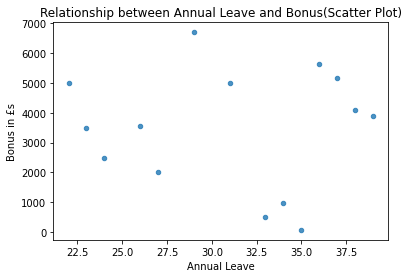

In [12]:
# Scatter plot

df1.plot.scatter(x = 'VacationHours', y = 'Bonus', alpha=0.8)
plt.title('Relationship between Annual Leave and Bonus' '(Scatter Plot)')
plt.xlabel('Annual Leave')
plt.ylabel('Bonus in £s')
plt.savefig('Q2scatter.png', dpi=300)
plt.show()

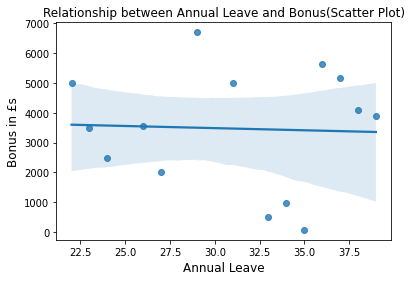

In [17]:


x = df1['VacationHours']
y = df1['Bonus']
graph = sns.regplot(x, y)
graph.set_xlabel( 'Annual Leave' , size = 12 )
graph.set_ylabel( 'Bonus in £s' , size = 12 )
graph.set_title( 'Relationship between Annual Leave and Bonus' '(Scatter Plot)' , size = 12 )
plt.savefig('Q2regr.png', dpi=300)


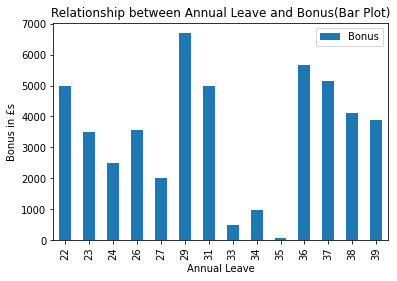

In [7]:
# Bar plot

df1.sort_values('VacationHours').plot.bar(x = 'VacationHours', y = 'Bonus')
plt.title('Relationship between Annual Leave and Bonus' '(Bar Plot)')
plt.xlabel('Annual Leave')
plt.ylabel('Bonus in £s')
plt.savefig('Q2bar.png', dpi=300)
plt.show()

In [8]:
# Calculating the correlation between the variables

corr = df1['VacationHours'].corr(df1['Bonus'])
print(corr)

-0.04149372768799522
